<a href="https://colab.research.google.com/github/Paco-clod/ProfitPredictionMachineLearning/blob/main/ProfitPredictionwithMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Profit Prediction with Machine Learning

Une entreprise doit toujours se fixer un objectif qui doit être atteignable, sinon les employés ne pourront pas travailler à leur meilleur potentiel s'ils constatent que l'objectif fixé par l'entreprise est irréalisable. La tâche de prédiction des bénéfices pour une période donnée est la même que la définition d'objectifs. Si vous savez combien de bénéfices vous pouvez réaliser avec la quantité de R&D et de marketing que vous effectuez, alors une entreprise peut réaliser plus que le bénéfice prévu à condition que la valeur prédite soit atteignable. Dans cet article, je vais donc vous expliquer la tâche de prédiction des bénéfices avec l'apprentissage automatique à l'aide de Python.

#Prévision des bénéfices grâce à l'apprentissage automatique

#EDA

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Use pandas' read_csv function to directly read data from a URL
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Startups.csv')

In [27]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Ces données ne contiennent aucune valeur manquante, donc sans perdre de temps, commençons par jeter un œil aux statistiques récapitulatives de ces données :

In [28]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
State
New York      17
California    17
Florida       16
Name: count, dtype: int64


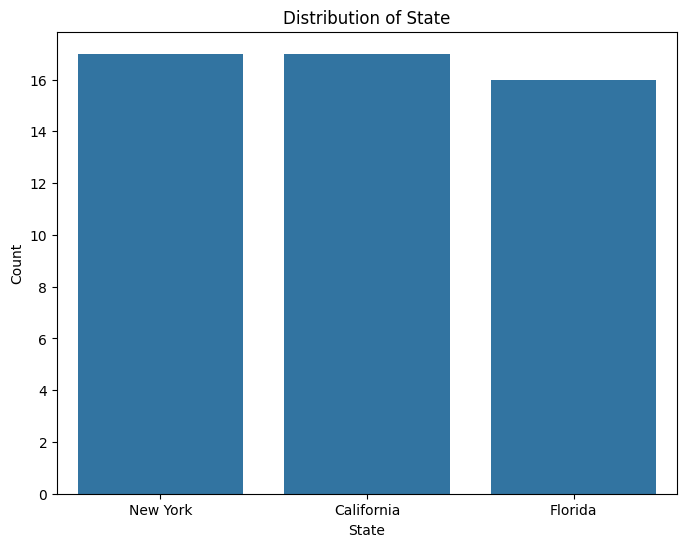

In [29]:
# Checking the data types of each column
print(data.info())

# Analyzing categorical variables (State in this case)
print(data['State'].value_counts())

# Visualizing the distribution of categorical variable 'State' using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='State', data=data)
plt.title('Distribution of State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Corrélation

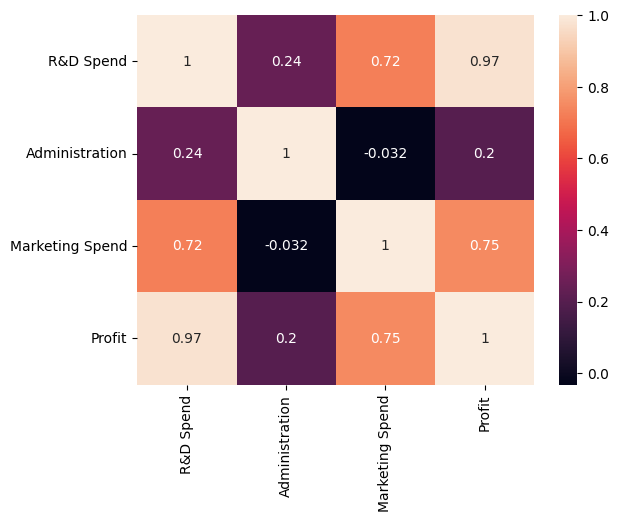

In [31]:
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

#Regression Linéaire

Comme cette tâche est basée sur le problème de régression, j'utiliserai l' algorithme de régression linéaire pour entraîner le modèle de prédiction des bénéfices. Préparons donc les données afin de pouvoir les intégrer au modèle :

In [13]:
x = data[["R&D Spend", "Administration", "Marketing Spend"]]
y = data["Profit"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Formons maintenant un modèle de régression linéaire sur ces données et examinons les valeurs prédites :

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})

In [18]:
data.head()

,Predicted Profit
0,126703.027165
1,84894.750816
2,98893.418160
3,46501.708150
4,129128.397344


#Résumé


Voilà donc comment nous pouvons prédire le bénéfice d'une entreprise sur une période donnée en utilisant des algorithmes d'apprentissage automatique. De telles tâches peuvent aider une entreprise à fixer un objectif atteignable. J'espère que vous avez aimé cet article sur la tâche de prédiction des bénéfices avec l'apprentissage automatique à l'aide de Python.